In [143]:
pip install opencv-contrib-python --user


In [1]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [15]:
face_classifier=cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
classifier = load_model('Emotion_little_vgg.h5')

In [3]:
class_labels=['Angry','fear','Happy','Neutral','Sad']
cap=cv2.VideoCapture(0)



while True:
    ret,frame=cap.read()
    labels=[]
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray])!=0:
            roi=roi_gray.astype('float')/255.0
            roi=img_to_array(roi)
            roi=np.expand_dims(roi,axis=0)

            preds=classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position=(x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(frame,'No Face Found',(20,20),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

(451, 500)

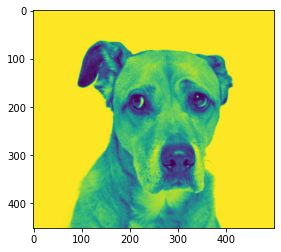

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
test_img=cv2.imread("fear-based-dog.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(test_img)
test_img.shape


In [23]:
test_img=test_img.astype('float')/255.0
test_img=img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
# test_img=cv2.resize(test_img,(48,48))
test_img=np.resize(test_img,(48,48))

In [24]:
test_img = test_img/255.0

test_img = np.reshape(test_img, (1,48,48,1))

In [27]:
preds=classifier.predict(test_img)
lbl=np.argmax(preds)
final=class_labels[lbl]
final




'Happy'

img1=cv2.imread("hap.jpg")

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
faces = cascade.detectMultiScale(gray, 1.1, 3)

for x,y,w,h in faces:
    cv2.rectangle(img1, (x,y), (x+w, y+h), (0,255,0), 2)

    cropped = img1[y:y+h, x:x+w]

cv2.imwrite('after.jpg', img1)

try:
    cv2.imwrite('cropped.jpg', cropped)

except:
     pass

    #####################################

try:
    image = cv2.imread('cropped.jpg', 0)
except:
    image = cv2.imread('file.jpg', 0)

image = np.resize(image, (48,48))
image = image.astype('float')/255.0

image = np.reshape(image, (1,48,48,1))

In [17]:
preds=classifier.predict(image)
lbl=np.argmax(preds)
final=class_labels[lbl]
final

'Angry'

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[nan, nan, nan, nan, nan]], dtype=float32)

TypeError: Expected Ptr<cv::UMat> for argument 'src'

In [69]:
# img=img.reshape(1,48,48,1)

ValueError: cannot reshape array of size 6912 into shape (1,48,48,1)

ValueError: in user code:

    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, None, None, 3)
